In [1]:
library(reshape2)
library(lubridate)
library(tseries)
library(MASS,stats)
library(car)

Loading required package: timechange


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Loading required package: carData



In [2]:
data <- read.csv("SP500.csv")
head(data)

,caldt,vwretd,vwretx,ewretd,ewretx,totval,totcnt,usdval,usdcnt,spindx,sprtrn
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>
1,20060103,0.016341,0.016340,0.015027,0.015023,11699545700,500,11540511600,500,1268.80,0.016430
2,20060104,0.003931,0.003736,0.006375,0.006284,11740829600,499,11697131300,499,1273.46,0.003673
3,20060105,0.000028,0.000021,0.000621,0.000611,11745619900,500,11745378700,500,1273.48,0.000016
4,20060106,0.009559,0.009322,0.010100,0.009988,11855262700,500,11745619900,500,1285.45,0.009399
5,20060109,0.003710,0.003708,0.005676,0.005673,11899300800,500,11855262700,500,1290.15,0.003656
6,20060110,-0.000340,-0.000394,0.000430,0.000379,11894617400,500,11899300800,500,1289.69,-0.000357


In [3]:
Ret <- data$sprtrn
dates <- ymd(data$caldt)

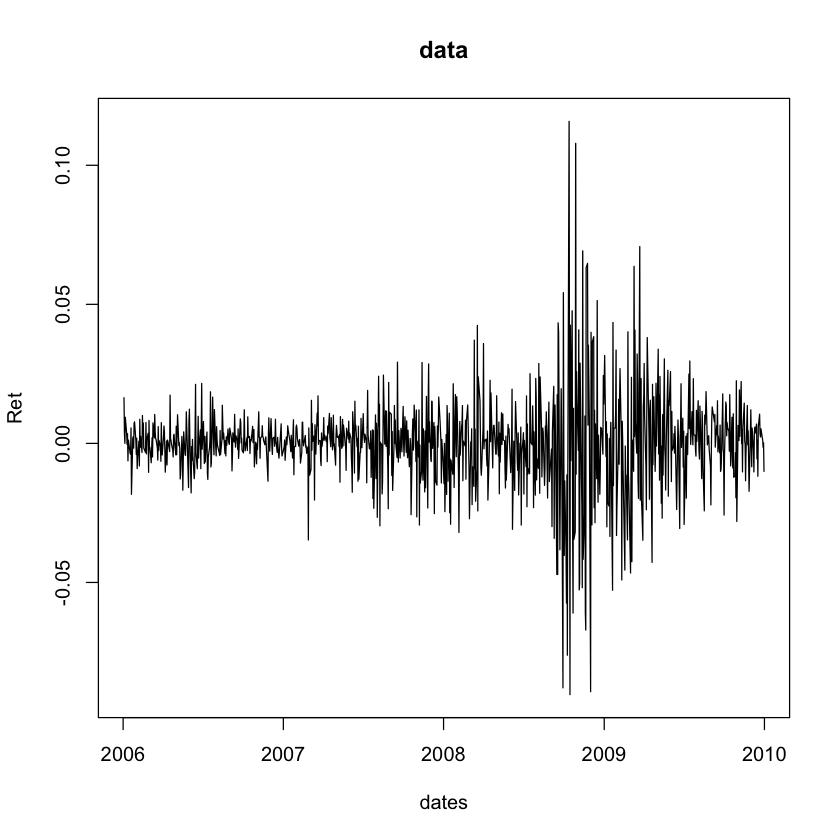

In [4]:
plot(dates, Ret, type = "l", main = "data")
# plot(Y$date, Y$JPM, type = "l", main = "Compound returns for JP Morgan", 
#     ylab = "Returns", xlab = "Date", col = "red")

In [5]:
tseries::jarque.bera.test(Ret)


	Jarque Bera Test

data:  Ret
X-squared = 3055.9, df = 2, p-value < 2.2e-16


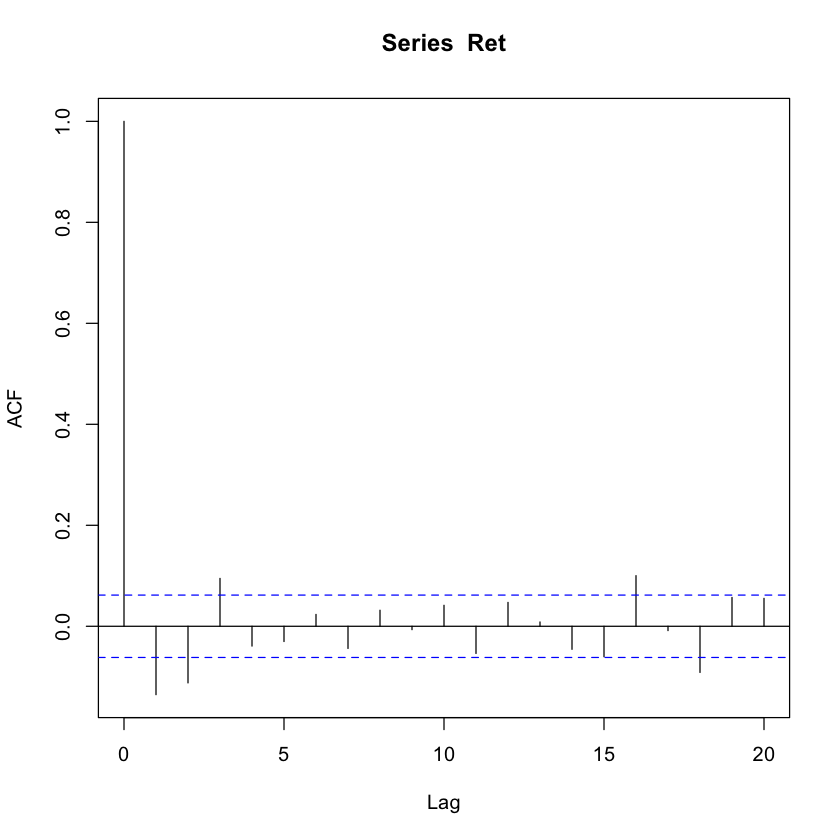

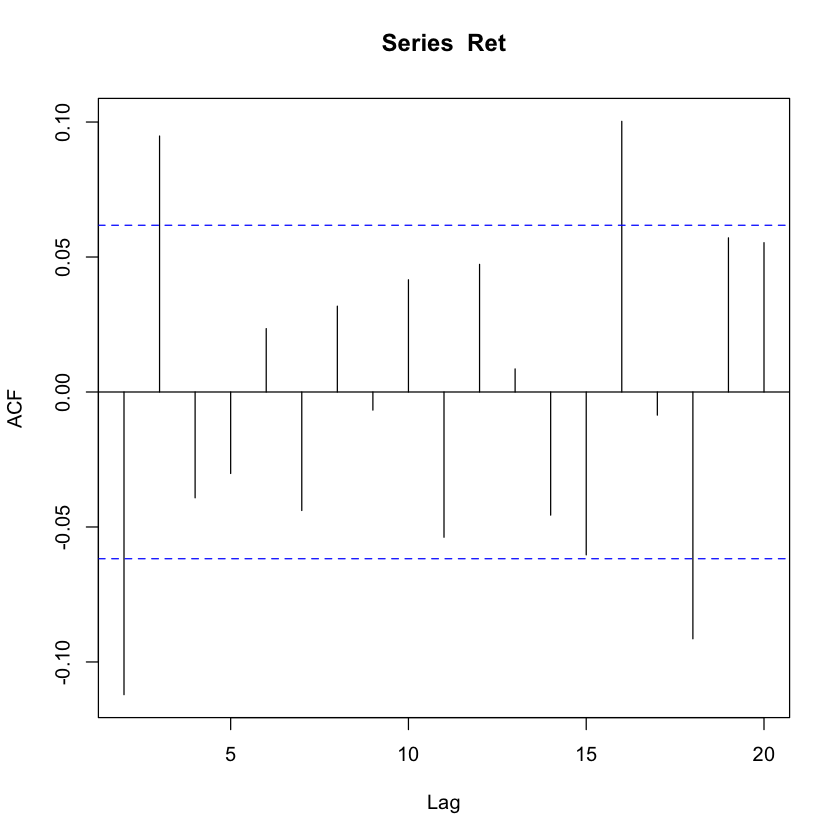

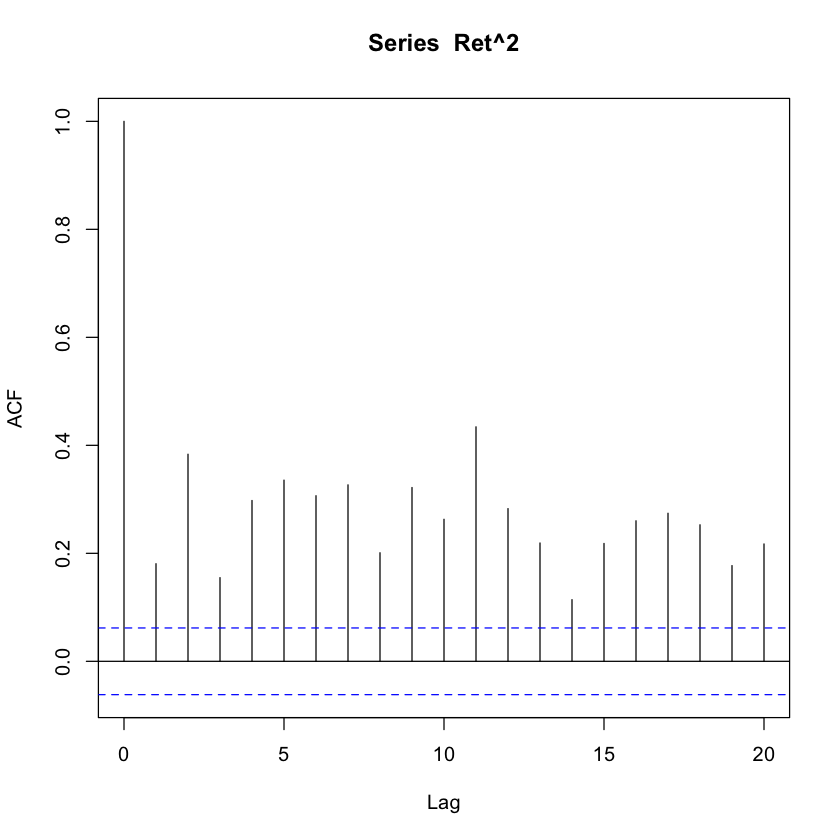


	Box-Ljung test

data:  Ret
X-squared = 91.661, df = 21, p-value = 8.33e-11



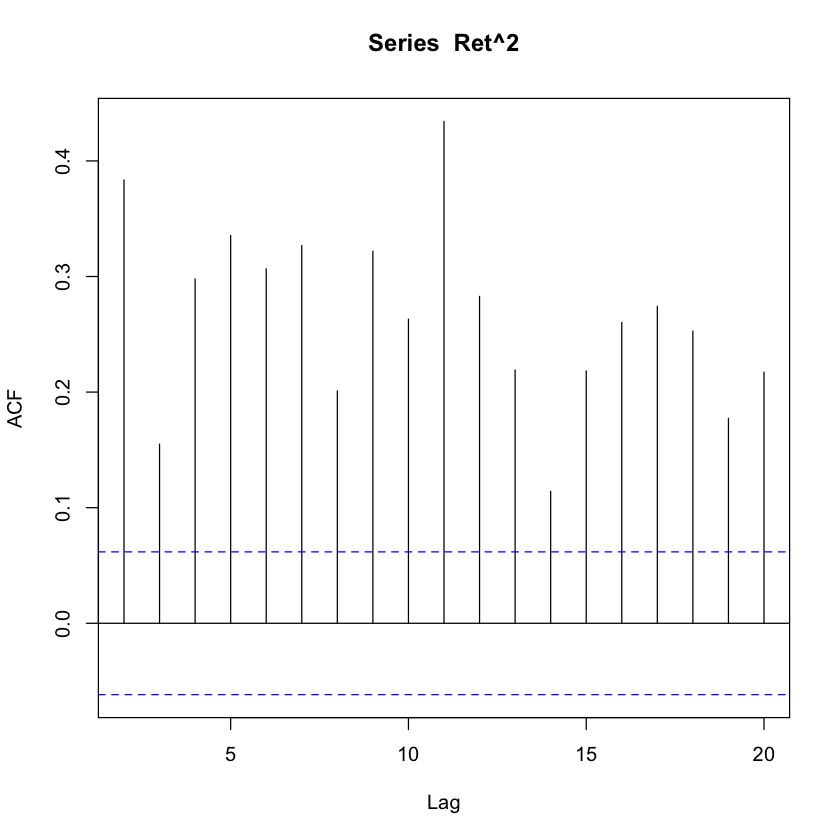

In [6]:
para = 20
q = acf(Ret,para)
plot(q[2:para])
q = acf(Ret^2,para)
plot(q[2:para])
b = Box.test(Ret,lag=para+1,type="Ljung-Box")
print(b)

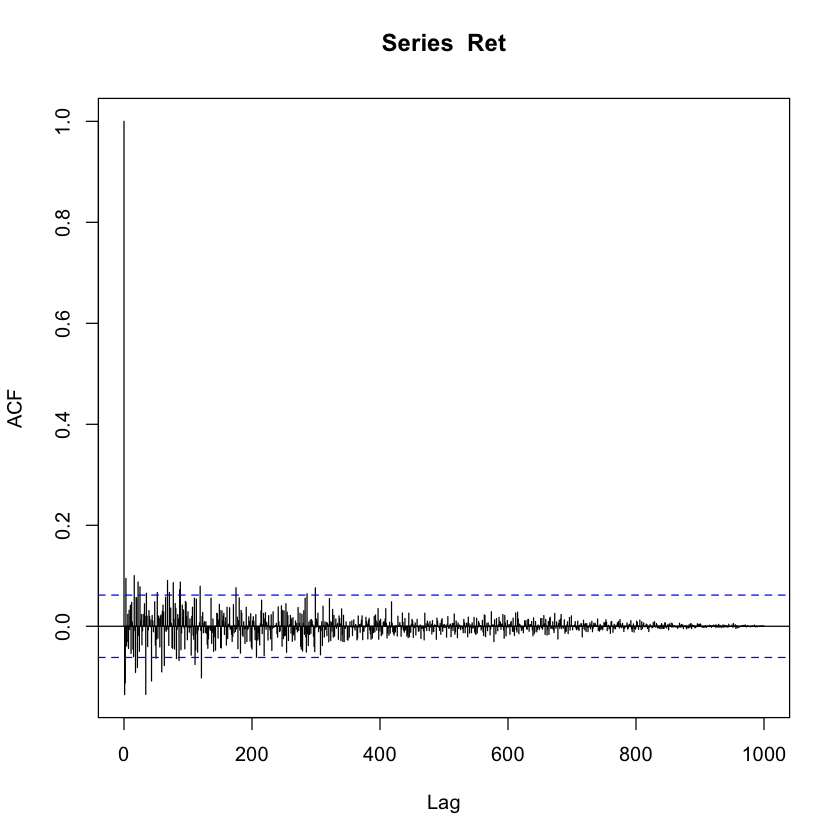

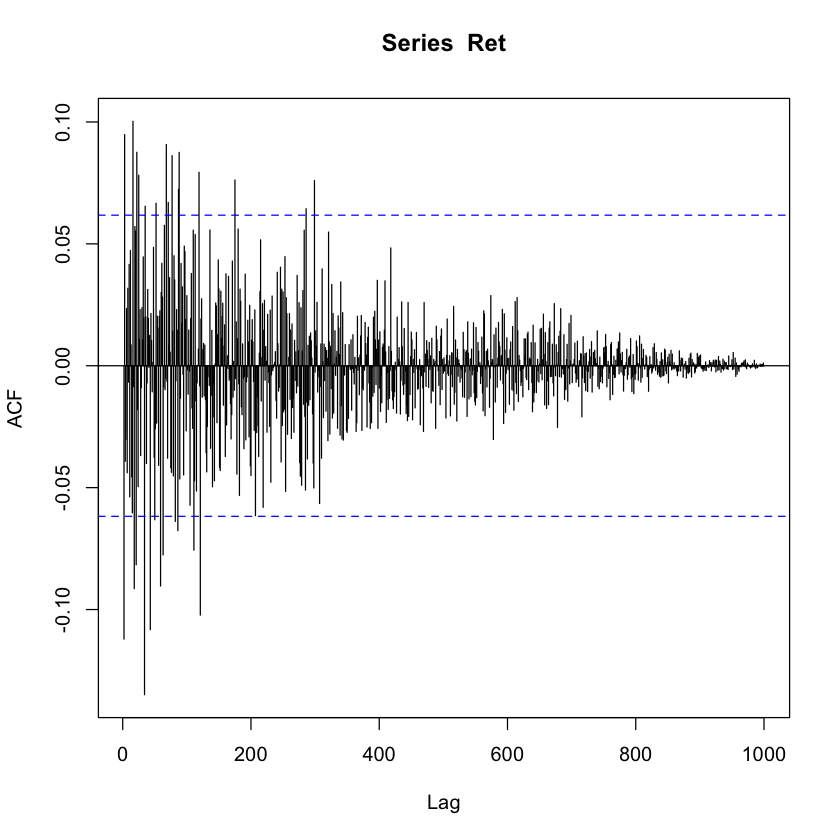

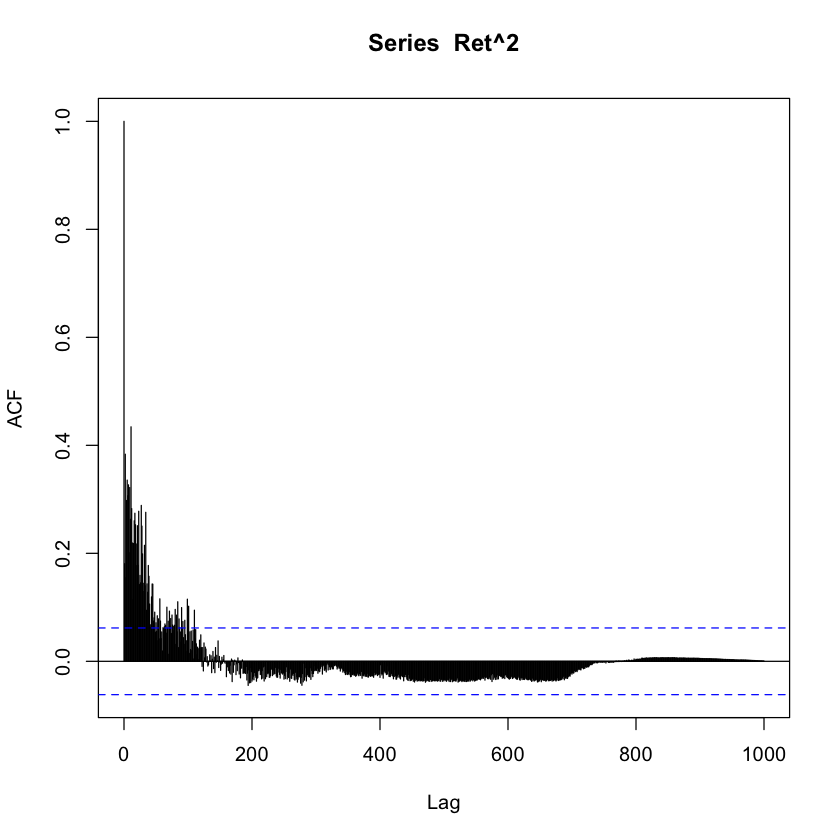


	Box-Ljung test

data:  Ret
X-squared = 679.66, df = 1001, p-value = 1



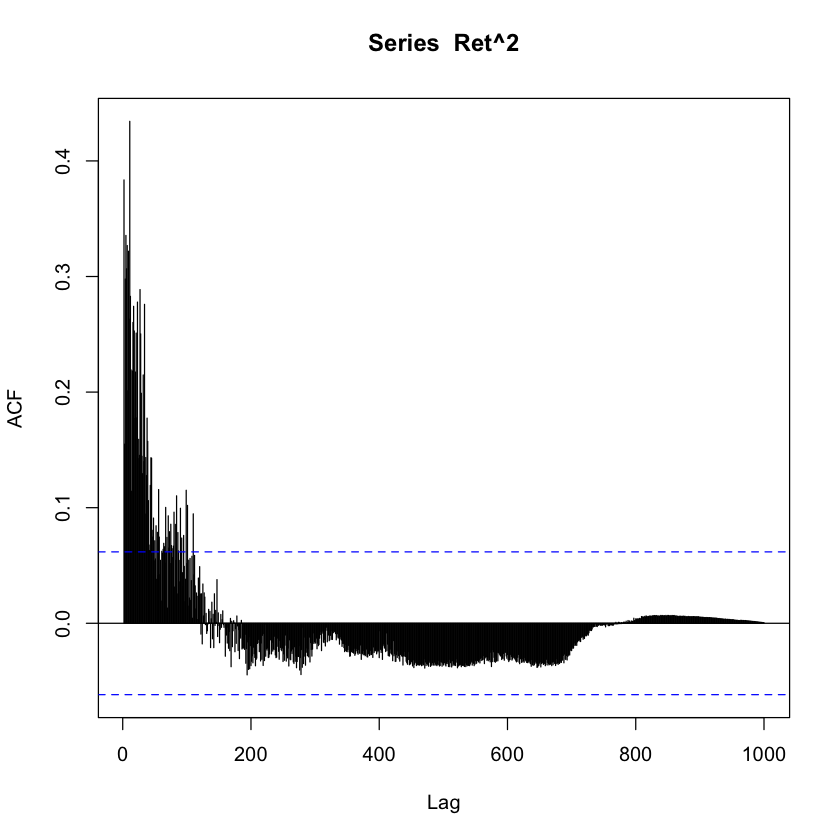

In [7]:
para = 1000
q = acf(Ret,para)
plot(q[2:para])
q = acf(Ret^2,para)
plot(q[2:para])
b = Box.test(Ret,lag=para+1,type="Ljung-Box")
print(b)

[1] 700 711

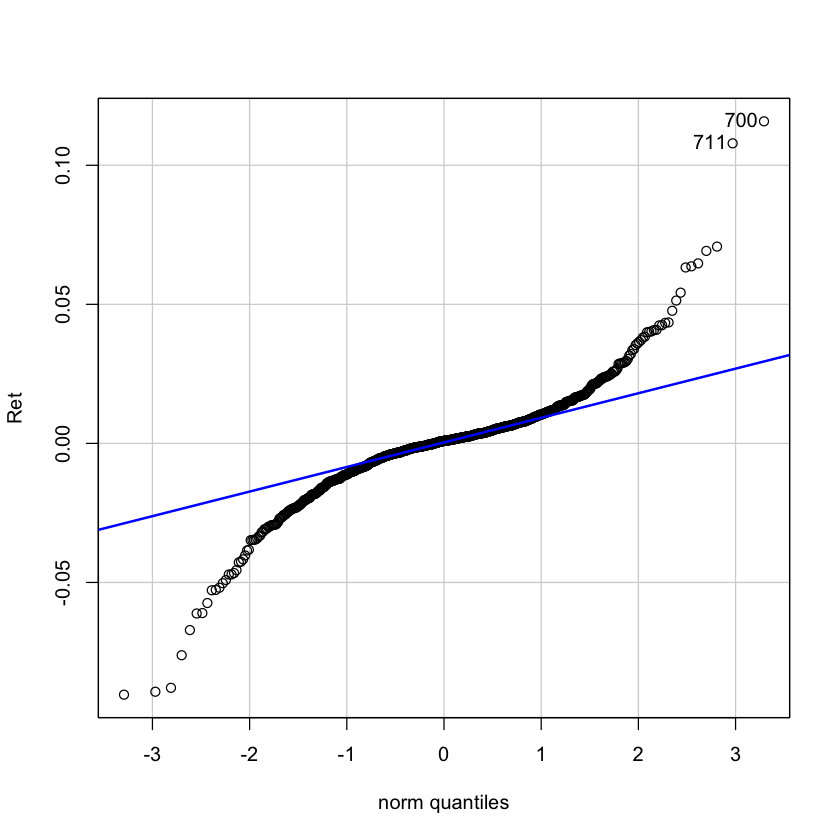

In [8]:
qqPlot(Ret, distribution = "norm", envelope = FALSE)

[1] 700 711

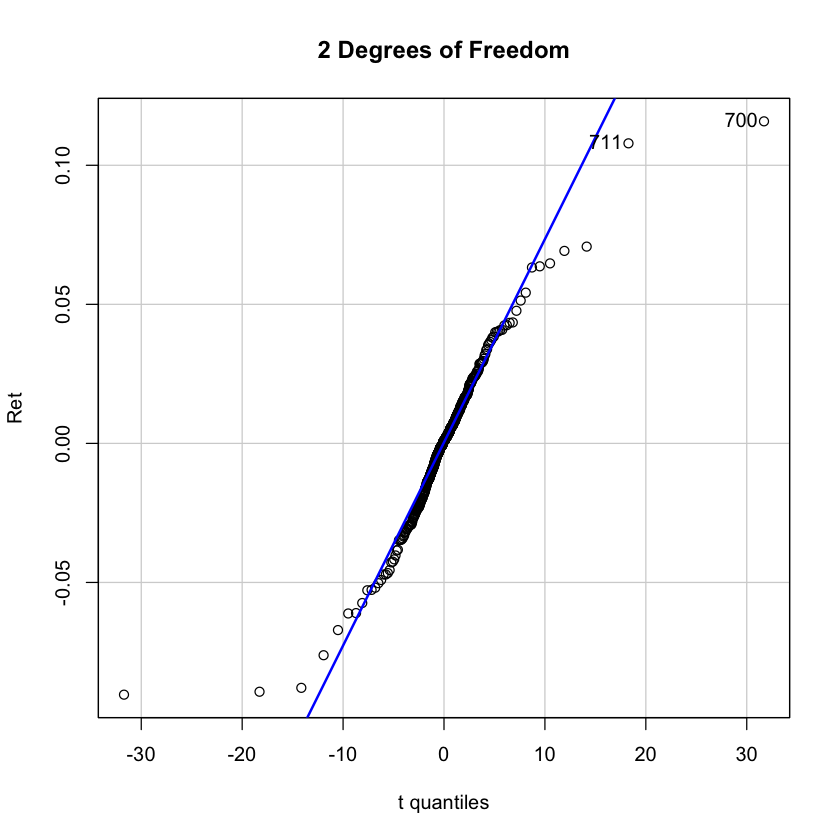

[1] 700 711

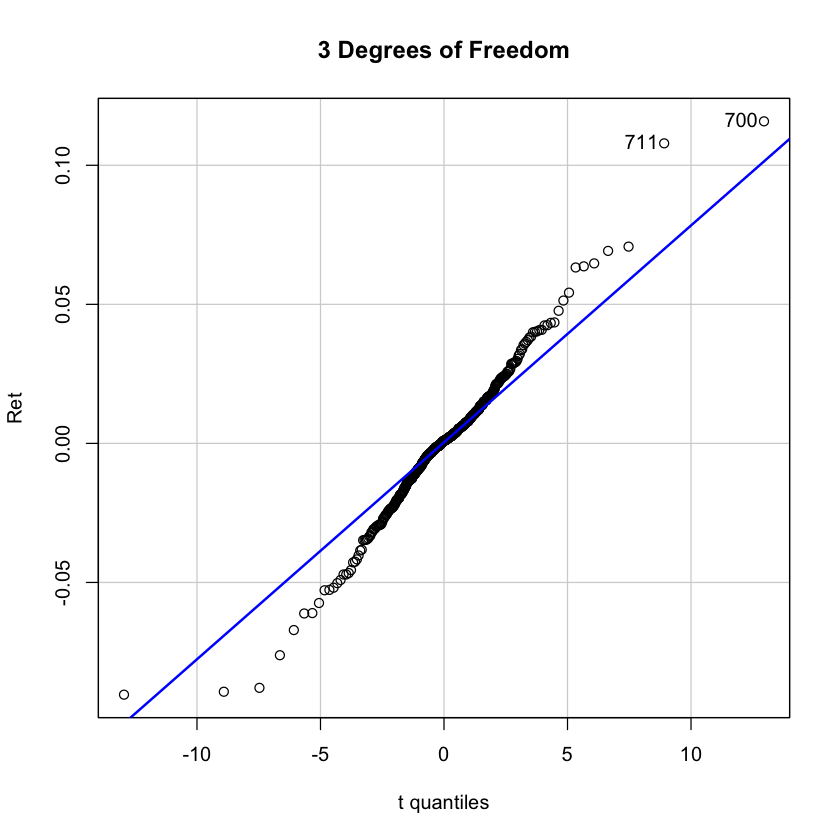

[1] 700 711

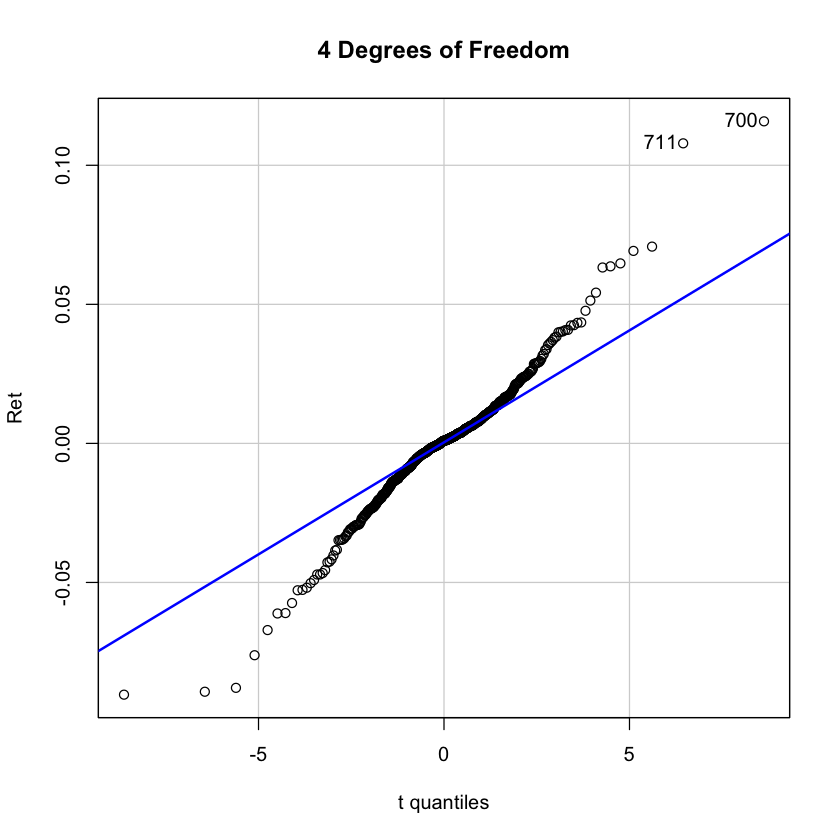

In [9]:
# 2 degrees of freedom
qqPlot(Ret, distribution = "t", df = 2, envelope = FALSE,
      main = "2 Degrees of Freedom")

# 3 degrees of freedom
qqPlot(Ret, distribution = "t", df = 3, envelope = FALSE,
      main = "3 Degrees of Freedom")

# 4 degrees of freedom
qqPlot(Ret, distribution = "t", df = 4, envelope = FALSE,
      main = "4 Degrees of Freedom")

In [10]:
library(fGarch)

NOTE: Packages 'fBasics', 'timeDate', and 'timeSeries' are no longer
attached to the search() path when 'fGarch' is attached.

If needed attach them yourself in your R script by e.g.,
        require("timeSeries")



In [11]:
# p=get.hist.quote(instrument = "^gspc", start = "2005-01-01", end="2009-12-31",quote="AdjClose",quiet=T
# y=diff(log(p))*100
y = Ret
y=y-mean(y)
# garchFit(~garch(1,0), data = y, include.mean=FALSE)
# garchFit(~garch(4,0), data = y, include.mean=FALSE)
# garchFit(~garch(4,1), data = y, include.mean=FALSE)
# garchFit(~garch(1,1), data = y, include.mean=FALSE)
# garchFit(~garch(1,1), data = y, include.mean=FALSE, cond.dist="std",trace=F)
res=garchFit(~garch(1,1), data = y, include.mean=FALSE, cond.dist="sstd",trace=F)
res
plot(res)


Title:
 GARCH Modelling 

Call:
 garchFit(formula = ~garch(1, 1), data = y, cond.dist = "sstd", 
    include.mean = FALSE, trace = F) 

Mean and Variance Equation:
 data ~ garch(1, 1)
<environment: 0x7f92b9083cc0>
 [data = y]

Conditional Distribution:
 sstd 

Coefficient(s):
     omega      alpha1       beta1        skew       shape  
6.8763e-07  9.5570e-02  9.0976e-01  8.8620e-01  5.5098e+00  

Std. Errors:
 based on Hessian 

Error Analysis:
        Estimate  Std. Error  t value Pr(>|t|)    
omega  6.876e-07   4.492e-07    1.531    0.126    
alpha1 9.557e-02   1.706e-02    5.601 2.13e-08 ***
beta1  9.098e-01   1.417e-02   64.208  < 2e-16 ***
skew   8.862e-01   3.220e-02   27.522  < 2e-16 ***
shape  5.510e+00   1.140e+00    4.832 1.35e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Log Likelihood:
 3080.519    normalized:  3.059105 

Description:
 Mon Nov 28 22:46:43 2022 by user:  


ERROR: Error in menu(choices = paste(" ", choices), title = "\nMake a plot selection (or 0 to exit):"): menu() cannot be used non-interactively
